Importing libraries:

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

Dataset loading: 

In [2]:
ds = pd.read_csv(r"C:\Users\INDU PRIYA\OneDrive\Attachments\Desktop\ML Models\cardekho_imputated.csv")
ds

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


Exploratory Data Analysis:

In [3]:
ds.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
ds.tail()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [5]:
ds.shape

(15411, 14)

In [6]:
ds.dtypes

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [7]:
ds.isna().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [8]:
ds.nunique()

Unnamed: 0           15411
car_name               121
brand                   32
model                  120
vehicle_age             24
km_driven             3688
seller_type              3
fuel_type                5
transmission_type        2
mileage                411
engine                 110
max_power              342
seats                    8
selling_price         1086
dtype: int64

Converting categorical to numerical

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
encoder = OneHotEncoder(sparse_output = False)

In [11]:
ds

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [12]:
ds.drop(ds[['Unnamed: 0','car_name']],axis = 1,inplace=True)

In [13]:
ds

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [14]:
cols = ['seller_type','fuel_type','transmission_type']

In [15]:
df = encoder.fit_transform(ds[cols])

In [16]:
Encode = pd.DataFrame(df,columns = encoder.get_feature_names_out(cols))

In [17]:
df = ds.drop(columns=cols)

In [18]:
Data = pd.concat([df,Encode],axis = 1)
Data

,brand,model,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,Maruti,Alto,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Hyundai,Grand,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,Hyundai,i20,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Maruti,Alto,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,Ford,Ecosport,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,Maruti,Ertiga,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,Skoda,Rapid,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,Mahindra,XUV500,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         15411 non-null  object 
 1   model                         15411 non-null  object 
 2   vehicle_age                   15411 non-null  int64  
 3   km_driven                     15411 non-null  int64  
 4   mileage                       15411 non-null  float64
 5   engine                        15411 non-null  int64  
 6   max_power                     15411 non-null  float64
 7   seats                         15411 non-null  int64  
 8   selling_price                 15411 non-null  int64  
 9   seller_type_Dealer            15411 non-null  float64
 10  seller_type_Individual        15411 non-null  float64
 11  seller_type_Trustmark Dealer  15411 non-null  float64
 12  fuel_type_CNG                 15411 non-null  float64
 13  f

Assumption Check:

In [20]:
Data.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05,0.618973,0.369801,0.011226,0.019532,0.481409,0.000260,0.002855,0.495944,0.206735,0.793265
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05,0.485655,0.482766,0.105359,0.138388,0.499670,0.016109,0.053359,0.500000,0.404977,0.404977
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
Data.drop(Data[['brand','model']],axis=1,inplace=True)
Data

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Linearity Check: 

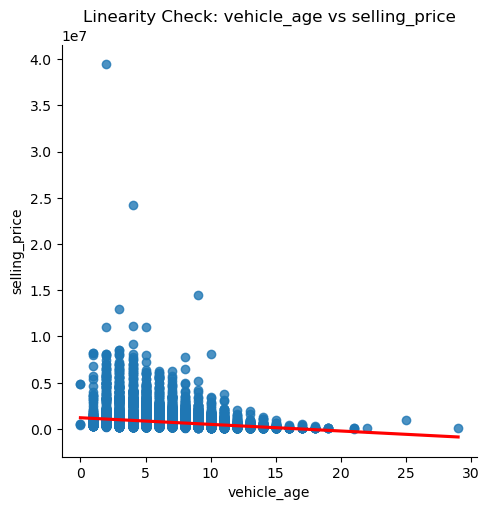

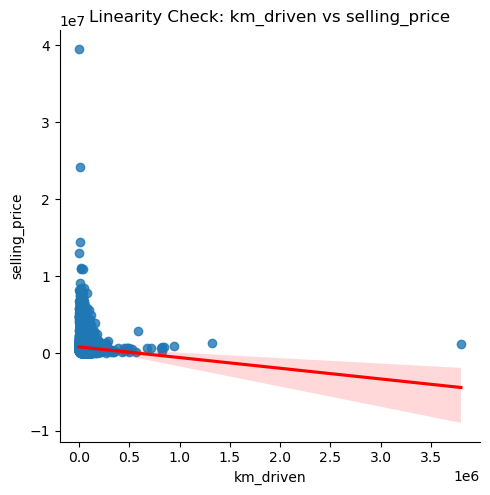

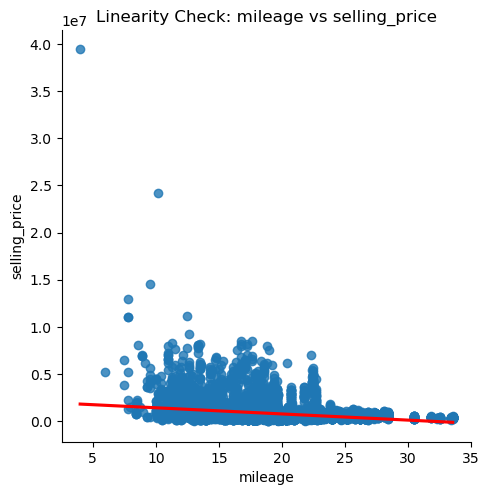

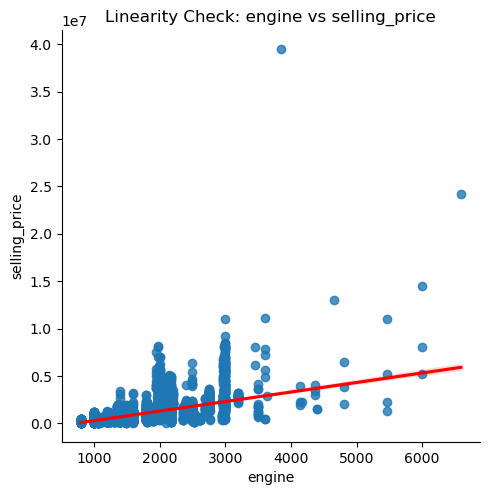

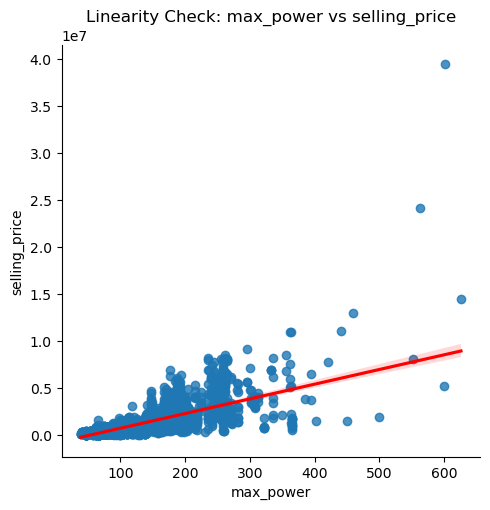

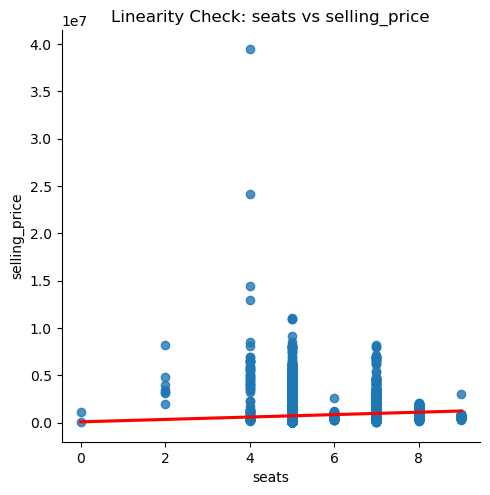

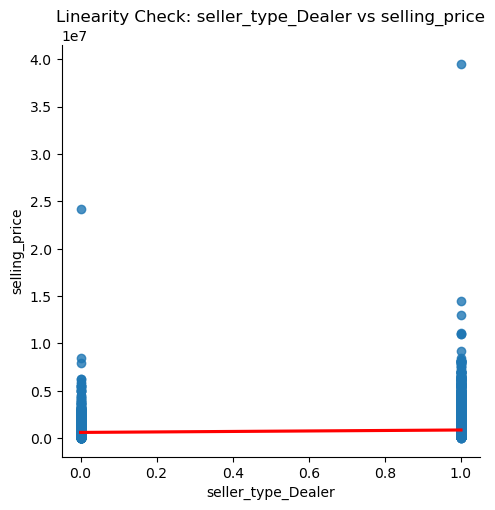

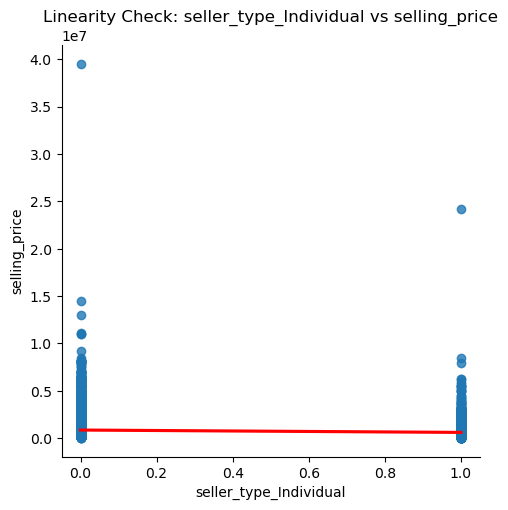

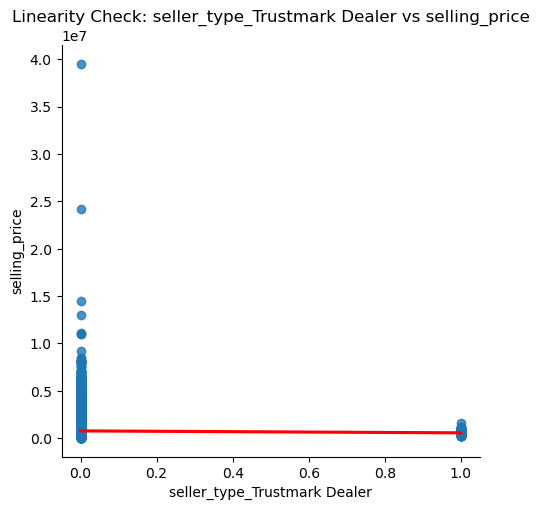

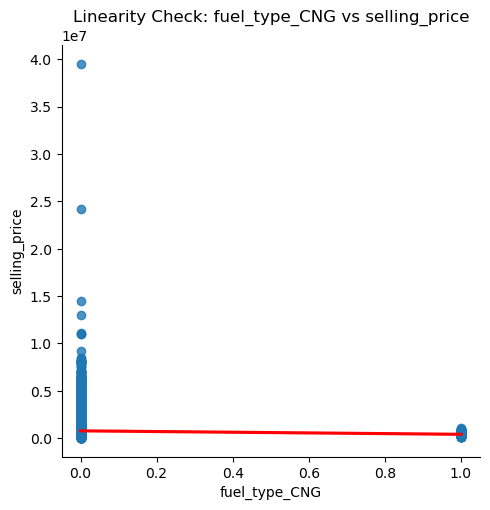

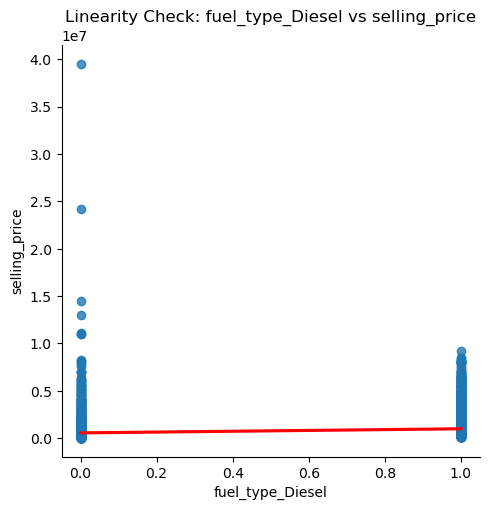

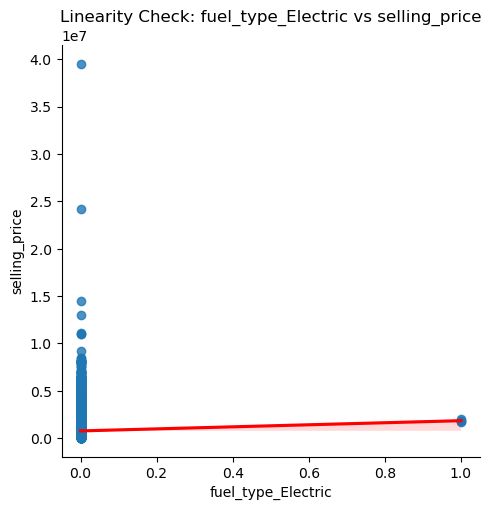

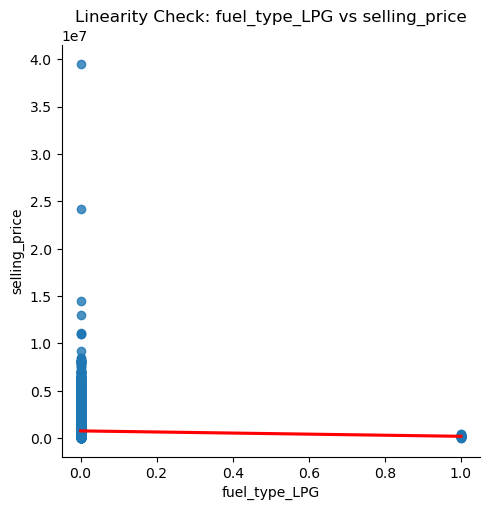

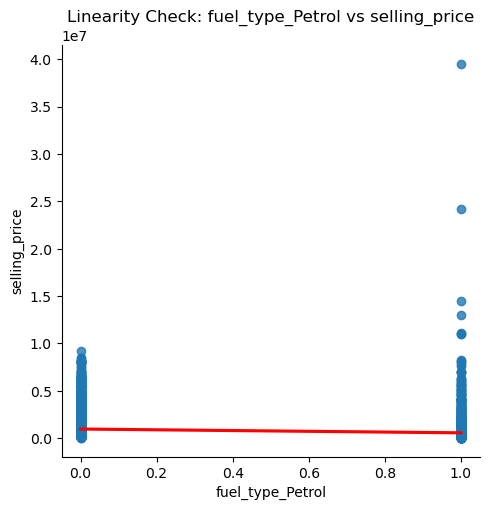

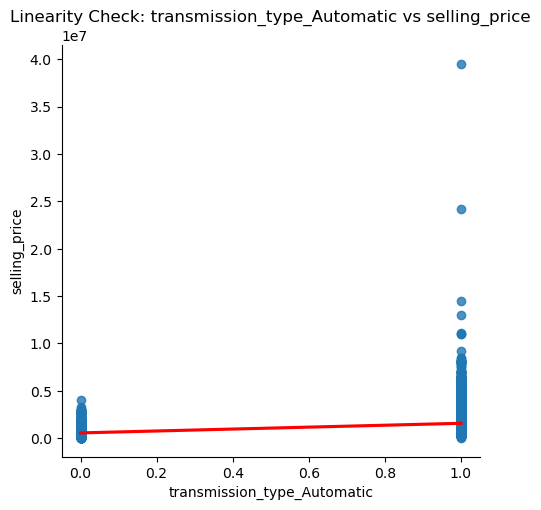

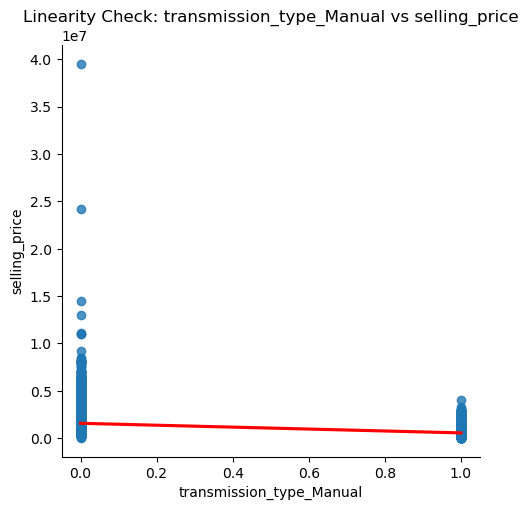

In [22]:
features = ['vehicle_age','km_driven','mileage','engine','max_power','seats','seller_type_Dealer','seller_type_Individual','seller_type_Trustmark Dealer','fuel_type_CNG','fuel_type_Diesel','fuel_type_Electric','fuel_type_LPG','fuel_type_Petrol','transmission_type_Automatic','transmission_type_Manual']
target = 'selling_price'
for col in features:
    sns.lmplot(x=col, y=target, data=Data, line_kws={'color': 'red'})
    plt.title(f"Linearity Check: {col} vs {target}")
    plt.show()

In [24]:
Data.corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851,0.045779,-0.032613,-0.061584,-0.024422,0.013594,-0.001531,0.089761,-0.016355,-0.080711,0.080711
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030,-0.048814,0.060044,-0.050116,-0.003294,0.249809,0.002812,0.022331,-0.251207,-0.073501,0.073501
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549,-0.079906,0.073703,0.030610,0.206865,0.082897,-0.002090,-0.023923,-0.137477,-0.282738,0.282738
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844,0.114754,-0.103192,-0.056123,-0.106117,0.494713,0.031167,-0.044654,-0.461256,0.348607,-0.348607
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236,0.185213,-0.177505,-0.040399,-0.117967,0.307386,0.021415,-0.050245,-0.269861,0.539448,-0.539448
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033,-0.049431,0.057600,-0.036079,-0.001724,0.336285,-0.006494,-0.021566,-0.333076,-0.058527,0.058527
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000,0.139037,-0.134589,-0.024193,-0.056400,0.242998,0.019436,-0.034035,-0.224222,0.459394,-0.459394
seller_type_Dealer,0.045779,-0.048814,-0.079906,0.114754,0.185213,-0.049431,0.139037,1.000000,-0.976345,-0.135806,0.028666,0.025361,0.004347,-0.028134,-0.030416,0.204218,-0.204218
seller_type_Individual,-0.032613,0.060044,0.073703,-0.103192,-0.177505,0.057600,-0.134589,-0.976345,1.000000,-0.081621,-0.041097,-0.006336,-0.003999,0.029547,0.014682,-0.201867,0.201867
seller_type_Trustmark Dealer,-0.061584,-0.050116,0.030610,-0.056123,-0.040399,-0.036079,-0.024193,-0.135806,-0.081621,1.000000,0.056173,-0.087869,-0.001717,-0.005702,0.072927,-0.016373,0.016373


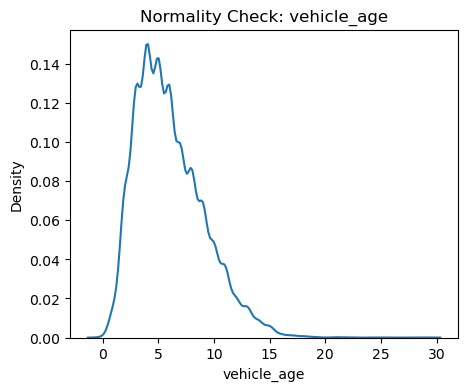

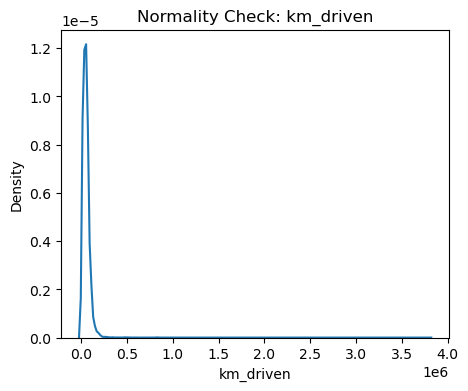

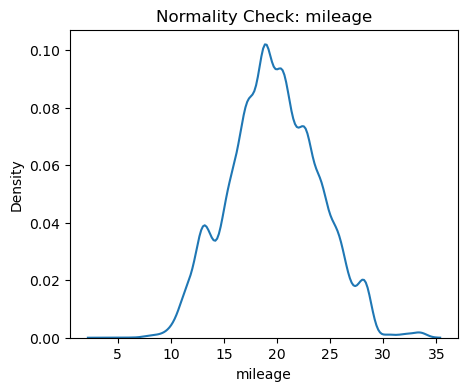

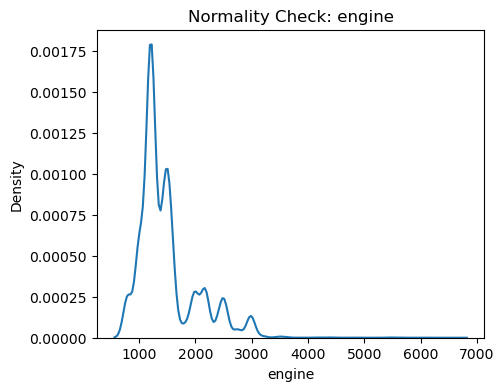

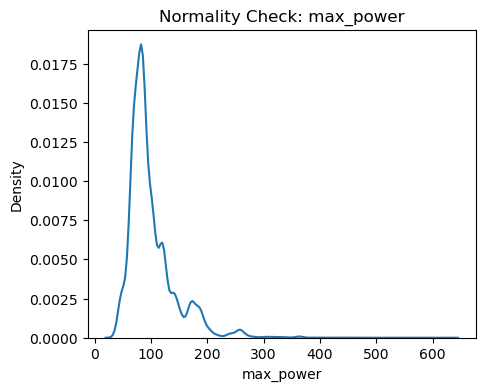

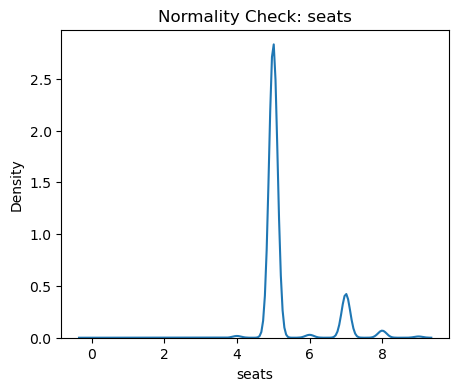

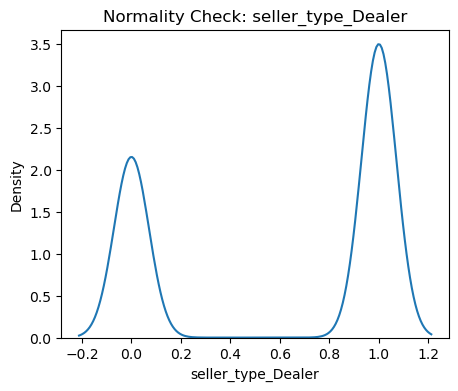

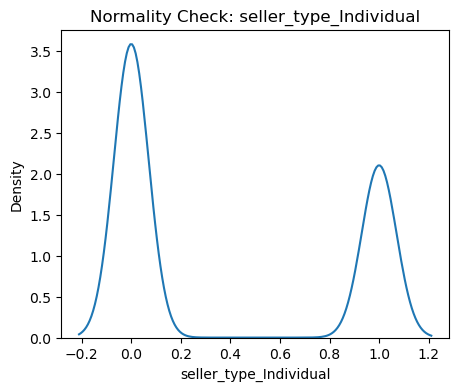

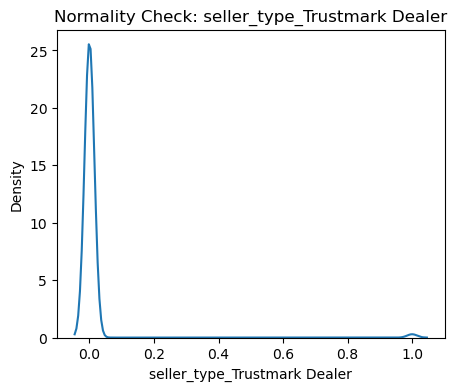

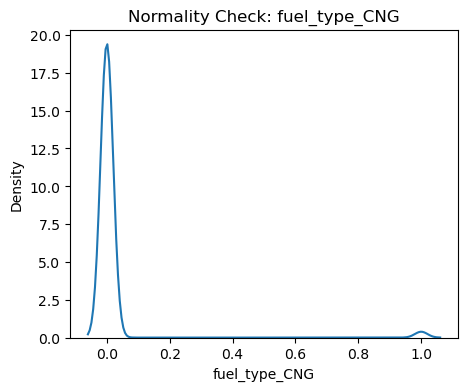

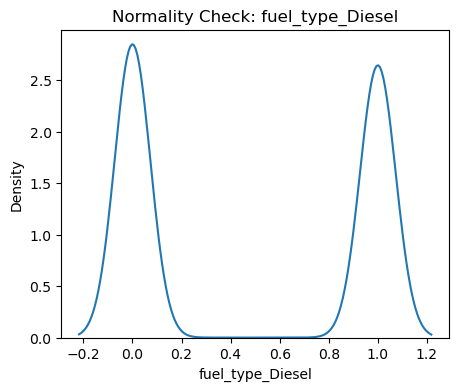

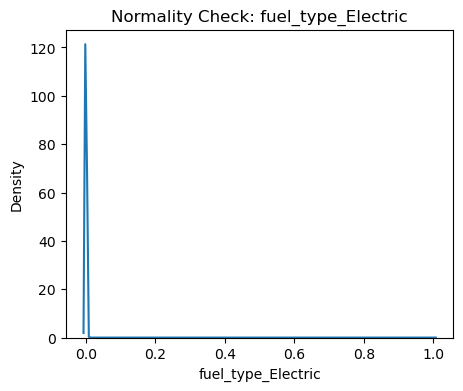

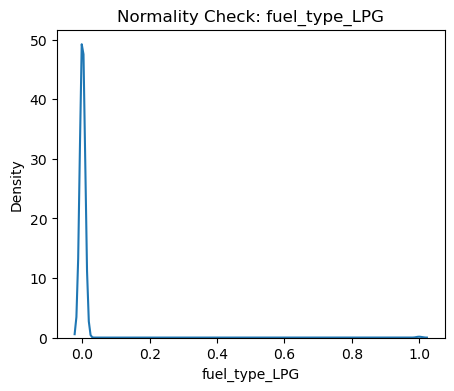

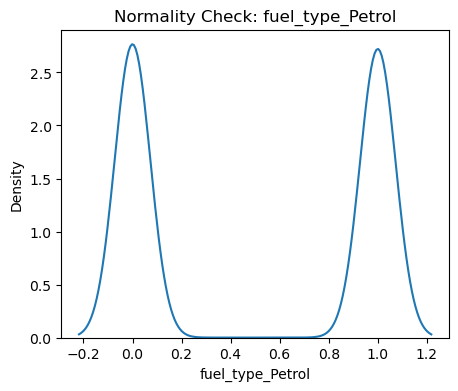

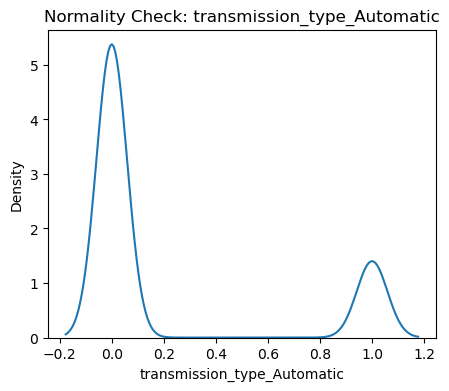

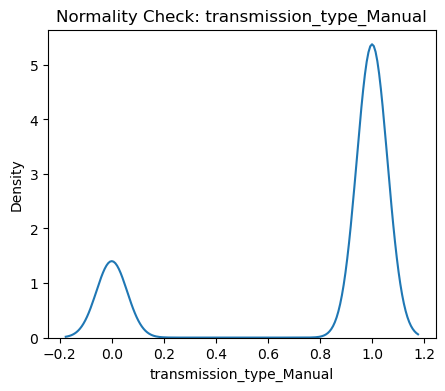

In [25]:
for col in features:
    plt.figure(figsize=(5, 4))
    sns.distplot(Data[col],hist=False)
    plt.title(f"Normality Check: {col}")
    plt.show()

Model Building:

In [26]:
x = Data[['vehicle_age','km_driven','mileage','engine','max_power','seats','seller_type_Dealer','seller_type_Individual','seller_type_Trustmark Dealer','fuel_type_CNG','fuel_type_Diesel','fuel_type_Electric','fuel_type_LPG','fuel_type_Petrol','transmission_type_Automatic','transmission_type_Manual']]
y = Data['selling_price']

In [27]:
x

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [28]:
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=35)

In [30]:
mlr = LinearRegression()

In [31]:
mlr.fit(x_train,y_train)

LinearRegression()

In [32]:
y_train_pred = mlr.predict(x_train)

In [33]:
y_test_pred = mlr.predict(x_test)

In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,root_mean_squared_error

In [35]:
mlr_r2 = r2_score(y_test,y_test_pred)
mlr_r2

0.6775735972262436

In [36]:
mlr_r2_train = r2_score(y_train,y_train_pred)
mlr_r2_train

0.6114676675433728

In [37]:
error_test = y_test - y_test_pred
error_test

2901      86444.332995
9246    -580969.801099
92      -107229.804697
11496    166979.200911
5666     -81147.567195
             ...      
1254      49988.383237
11626     95778.450519
14559     88963.281621
5283    -100390.466163
196      188165.008740
Name: selling_price, Length: 4624, dtype: float64

Homoscedsicity check:

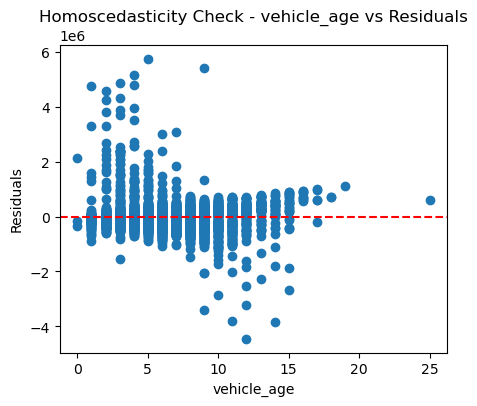

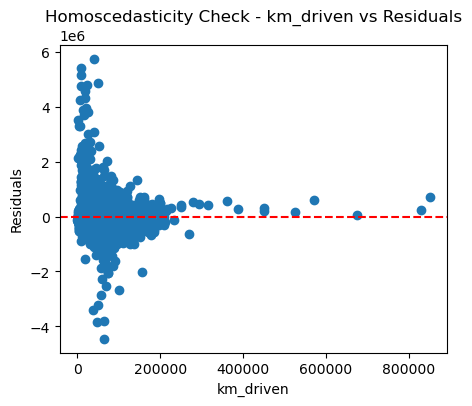

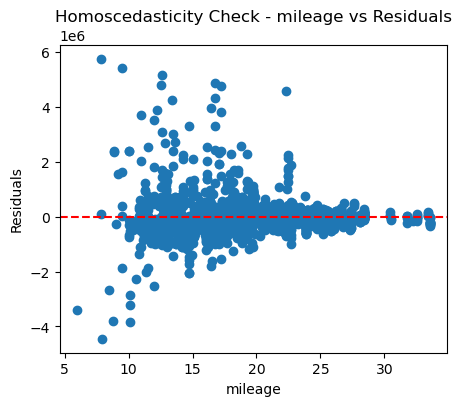

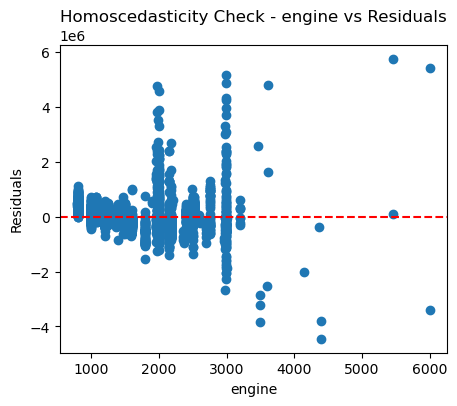

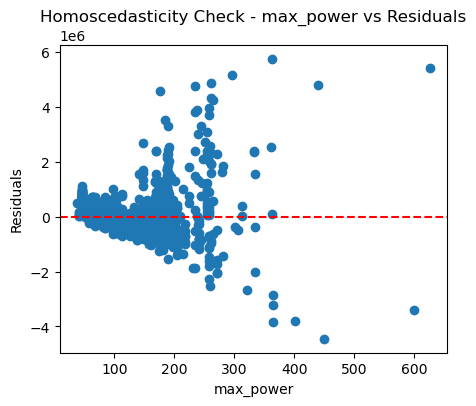

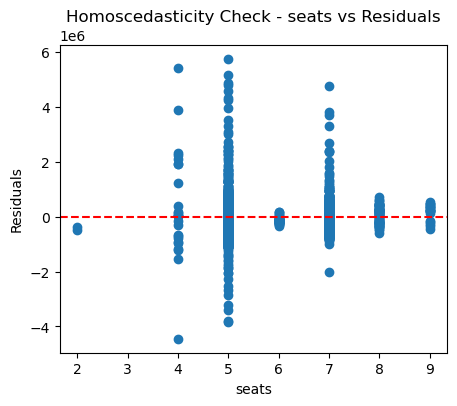

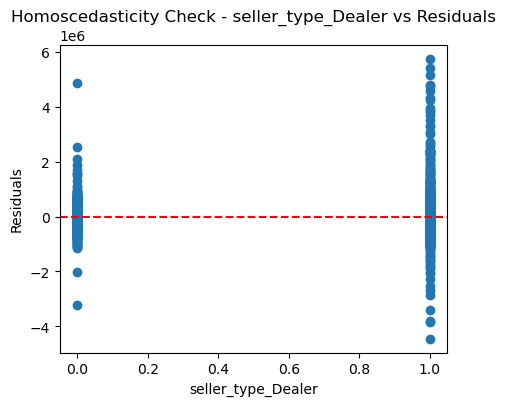

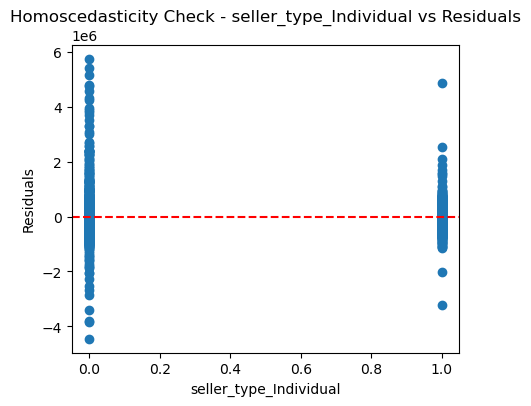

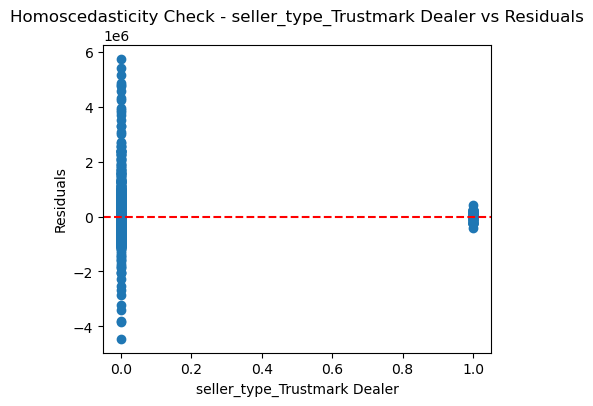

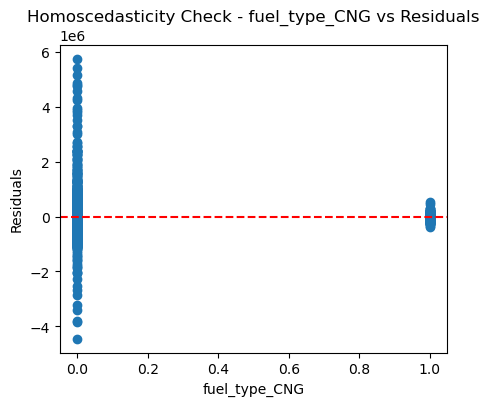

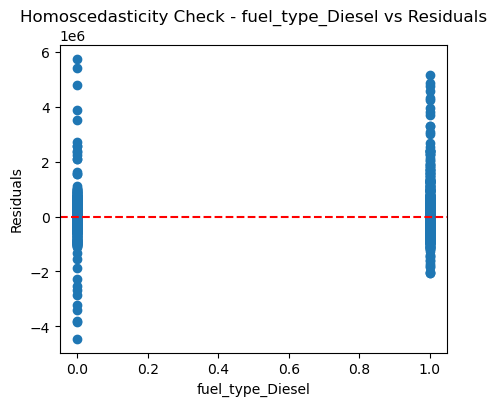

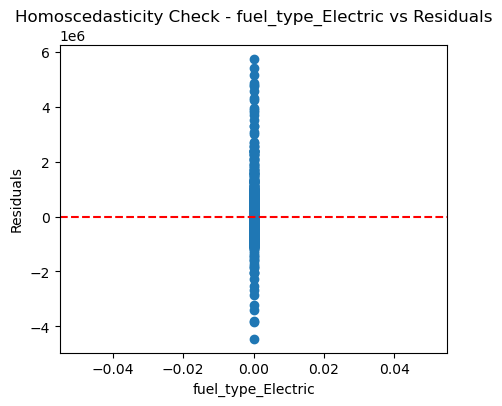

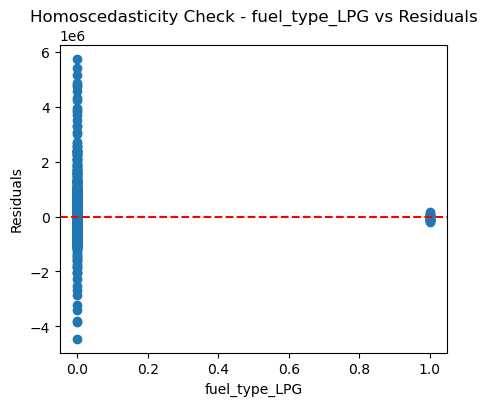

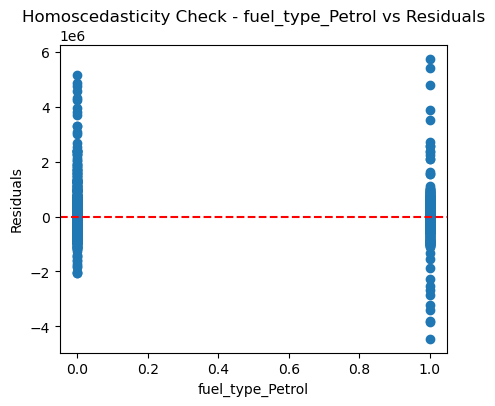

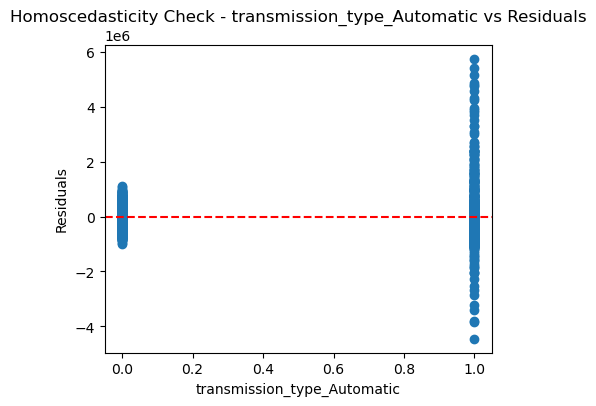

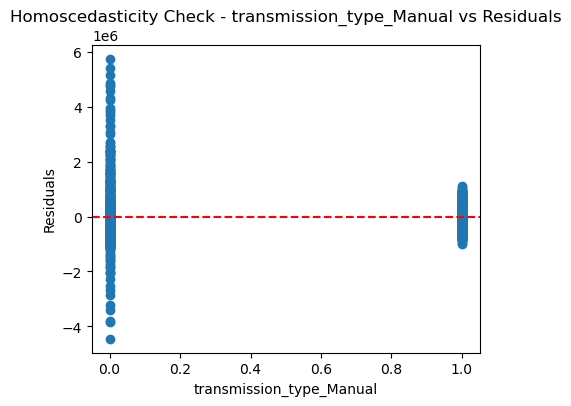

In [38]:
for col in features:
    plt.figure(figsize=(5,4))
    plt.scatter(x = x_test[col], y = error_test)
    plt.title(f'Homoscedasticity Check - {col} vs Residuals')
    plt.xlabel(col)
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.show()

Residuals - Normality Check

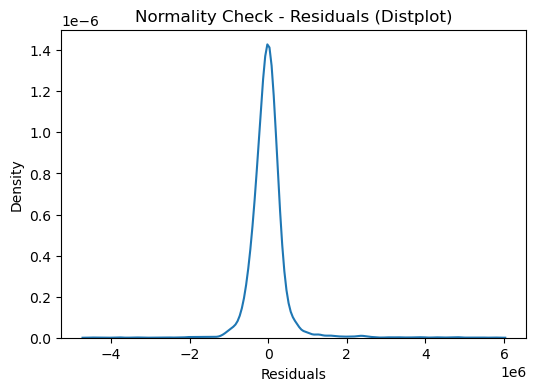

In [39]:

res = error_test.to_numpy()
res = res[np.isfinite(res)]

# Distplot for normality check
plt.figure(figsize=(6,4))
sns.distplot(res,hist=False)
plt.title("Normality Check - Residuals (Distplot)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

Ridge and Lasso

In [40]:
from sklearn.linear_model import Ridge,Lasso

In [41]:
l = Lasso()
l.fit(x_train,y_train)
y_train_pred = l.predict(x_train)
y_test_pred = l.predict(x_test)

In [42]:
Lasso_r2 = r2_score(y_test,y_test_pred)
Lasso_r2

0.6775741666724061

In [43]:
r = Ridge()
r.fit(x_train,y_train)
y_train_pred = r.predict(x_train)
y_test_pred = r.predict(x_test)

In [44]:
Ridge_r2 = r2_score(y_test,y_test_pred)
Ridge_r2

0.6775839551582674

Creating a Pickle file

In [47]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("priceprediction.pkl","wb")
pickle.dump(mlr, pickle_out)
pickle_out.close()

In [46]:
!pip install streamlit

In [48]:
!pip install streamlit pandas numpy joblib scikit-learn plotly pillow matplotlib streamlit-lottie

   ---------------------------------------- 0.0/802.4 kB ? eta -:--:--
   ---------------------------------------- 802.4/802.4 kB 5.0 MB/s eta 0:00:00
